In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

In [277]:
infected_dataset = "data/time_series_covid19_confirmed_global.csv"
recovered_dataset = "data/time_series_covid19_recovered_global.csv"
deaths_dataset = "data/time_series_covid19_deaths_global.csv"
countries_dataset ="data/UID_ISO_FIPS_LookUp_Table.csv"

In [278]:
infected = pd.read_csv(infected_dataset)
infected.plot()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [279]:
recovered = pd.read_csv(recovered_dataset)
deaths = pd.read_csv(deaths_dataset)

In [280]:
infected['Province/State'].value_counts()

Ningxia                      1
Jiangxi                      1
Henan                        1
Montserrat                   1
Guizhou                      1
                            ..
Diamond Princess             1
Gansu                        1
St Martin                    1
Newfoundland and Labrador    1
Chongqing                    1
Name: Province/State, Length: 91, dtype: int64

In [1]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.plot(x='Country/Region',y=['1/22/20','1/23/20','1/24/20','1/25/20','1/26/20','1/27/20','1/28/20','1/29/20','2/28/23','3/1/23','3/2/23','3/3/23','3/4/23','3/5/23','3/6/23','3/7/23','3/8/23','3/9/23'])

NameError: name 'infected' is not defined

In [282]:
infected.loc['US'][2:]

1/22/20            1.0
1/23/20            1.0
1/24/20            2.0
1/25/20            2.0
1/26/20            5.0
              ...     
3/5/23     103646975.0
3/6/23     103655539.0
3/7/23     103690910.0
3/8/23     103755771.0
3/9/23     103802702.0
Name: US, Length: 1143, dtype: float64

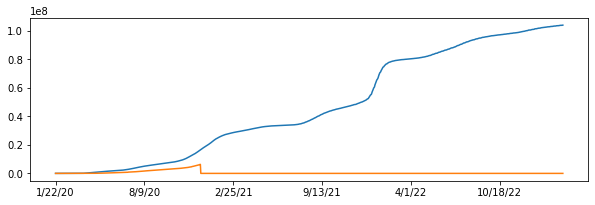

In [283]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()

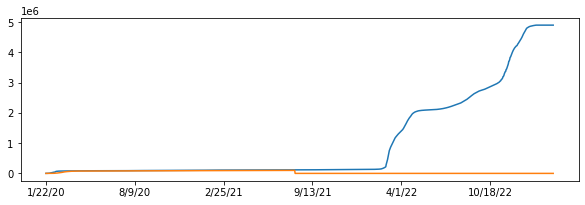

In [284]:
infected.loc['China'][2:].plot()
recovered.loc['China'][2:].plot()
plt.show()


In [285]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)


In [286]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df

,infected,recovered,deaths
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
2020-01-26,5,0,0
...,...,...,...
2023-03-05,103646975,0,1122134
2023-03-06,103655539,0,1122181
2023-03-07,103690910,0,1122516
2023-03-08,103755771,0,1123246


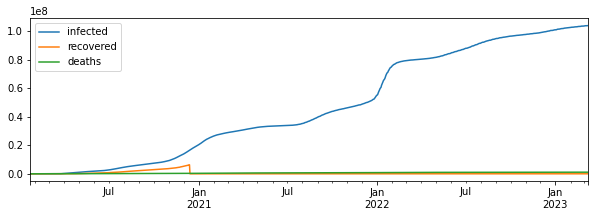

In [287]:
df.plot()
plt.show()

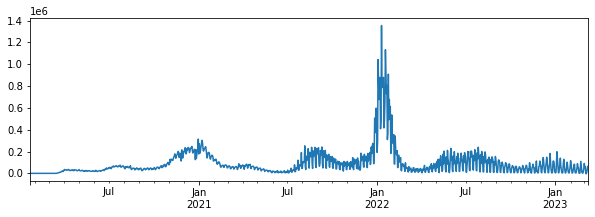

In [288]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

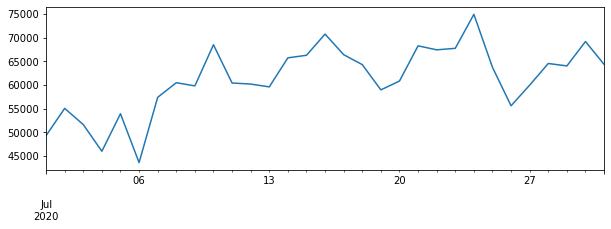

In [289]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

In [290]:
df['ninfected']

2020-01-22        NaN
2020-01-23        0.0
2020-01-24        1.0
2020-01-25        0.0
2020-01-26        3.0
               ...   
2023-03-05    -3862.0
2023-03-06     8564.0
2023-03-07    35371.0
2023-03-08    64861.0
2023-03-09    46931.0
Name: ninfected, Length: 1143, dtype: float64

In [291]:
countries = pd.read_csv('data/UID_ISO_FIPS_LookUp_Table.csv')
countries

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4316,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4317,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4318,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4319,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


In [292]:
countries[(countries['Country_Region']=='Nigeria') & countries['Province_State'].isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
471,566,NG,NGA,566.0,NaN,NaN,NaN,Nigeria,9.082,8.6753,Nigeria,206139587.0


In [293]:
countries[(countries['Country_Region']=='Nigeria')]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
471,566,NG,NGA,566.0,NaN,NaN,NaN,Nigeria,9.0820,8.6753,Nigeria,206139587.0
472,56601,NG,NGA,566.0,NaN,NaN,Abia,Nigeria,5.4527,7.5248,"Abia, Nigeria",3727347.0
473,56602,NG,NGA,566.0,NaN,NaN,Adamawa,Nigeria,9.3265,12.3984,"Adamawa, Nigeria",4248436.0
474,56603,NG,NGA,566.0,NaN,NaN,Akwa Ibom,Nigeria,4.9057,7.8537,"Akwa Ibom, Nigeria",5482177.0
475,56604,NG,NGA,566.0,NaN,NaN,Anambra,Nigeria,6.2209,6.9370,"Anambra, Nigeria",5527809.0
476,56605,NG,NGA,566.0,NaN,NaN,Bauchi,Nigeria,10.7761,9.9992,"Bauchi, Nigeria",6537314.0
477,56606,NG,NGA,566.0,NaN,NaN,Bayelsa,Nigeria,4.7719,6.0699,"Bayelsa, Nigeria",2277961.0
478,56607,NG,NGA,566.0,NaN,NaN,Benue,Nigeria,7.3369,8.7404,"Benue, Nigeria",5741815.0
479,56608,NG,NGA,566.0,NaN,NaN,Borno,Nigeria,11.8846,13.1520,"Borno, Nigeria",5860183.0
480,56609,NG,NGA,566.0,NaN,NaN,Cross River,Nigeria,5.8702,8.5988,"Cross River, Nigeria",3866269.0
